<a href="https://colab.research.google.com/github/Thrcordeiro/GradienteDescendente/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##**Universidade Federal de Pernambuco**
##**Centro de Informática**
##**Pós-graduação em Ciência de Dados**

**Regressão Linear utilizando o Gradiente Descendente**


- Thaina Mariah Ramos Cordeiro



# **1 - Importação das Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('default')


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#**2 -Carregamento do dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/manueladinizc/linear-regression-exercise/main/Linear1.csv')  
df.head(10)

,Horas,Pontuação
0,4,51
1,6,72
2,1,12
3,3,26
4,10,98
5,9,91
6,8,85
7,4,55
8,2,15
9,5,48


In [ ]:
df.shape

(21, 2)

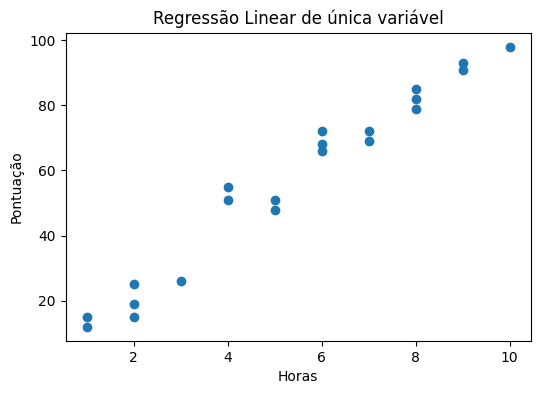

In [ ]:
# Podemos observar que o dataset possui as variáveis horas de estudo e pontuação obtida.
# Para realizar a regressão linear, considerou-se a Pontuação como variável dependente e o número de horas como variável independente.
# Variável independente X: Horas
# Variável dependente Y: Pontuação
plt.figure(figsize = (6,4))
plt.scatter(df['Horas'], df['Pontuação'])
plt.xlabel('Horas')
plt.ylabel('Pontuação')
plt.title('Regressão Linear de única variável')
plt.show()

In [ ]:
#Podemos ver alguns dados da estatística descritiva abaixo:
df.describe()

,Horas,Pontuação
count,21.000000,21.000000
mean,5.380952,56.761905
std,2.801360,28.248725
min,1.000000,12.000000
25%,3.000000,26.000000
50%,6.000000,66.000000
75%,8.000000,79.000000
max,10.000000,98.000000


#**3 - Preparação dos dados (pré-processamento)**

In [ ]:
X = df.drop(['Pontuação'], axis = 1)
Y = df['Pontuação']
X

,Horas
0,4
1,6
2,1
3,3
4,10
5,9
6,8
7,4
8,2
9,5


#**4 - Normalização da Variável X**

In [ ]:
# Embora nesse exemplo a regressão seja realizada com apenas uma variável independente, realizou-se a transformação de escala
# por meio da classe StandardScaler, a título de exemplo.

escala = StandardScaler()
escala.fit(X)
X_norm = escala.transform(X)
print(X_norm)

[[-0.50513144]
 [ 0.22643823]
 [-1.60248593]
 [-0.87091627]
 [ 1.68957756]
 [ 1.32379273]
 [ 0.95800789]
 [-0.50513144]
 [-1.2367011 ]
 [-0.1393466 ]
 [-1.2367011 ]
 [ 0.22643823]
 [ 0.59222306]
 [-0.1393466 ]
 [ 0.59222306]
 [-1.2367011 ]
 [ 0.22643823]
 [ 0.95800789]
 [ 1.32379273]
 [ 0.95800789]
 [-1.60248593]]


In [ ]:
#Em seguida, a separação dos dados de treino (70%) e de teste (30%)

X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=0) 

#**5 - Processamento**

In [ ]:
# Para realizar a regressão linear utilizando o método do Gradiente Descendente, basta executar a função SGDRegressor e fazer o ajuste 
# dos dados (fit). No caso, utilizou-se os seguintes parâmetros:

# max_iter: número máximo de iterações, se não convergir antes = 5000
# eta0: taxa de aprendizado = 0.1
# tol: critério de convergência (parada do loop) = 0.001
# verbose: True (1) mostra o aprendizado a cada iteração. False (0) não mostra.

regressor = SGDRegressor(max_iter = 5000, eta0 = 0.1, tol = 0.001, verbose = 0)
regressor.fit(X_norm_train, Y_train)

SGDRegressor(eta0=0.1, max_iter=5000)

# **6 - Pós-processamento**

In [ ]:
# Realiza a previsão da variável dependente utilizando os dados de teste.
Y_prev = regressor.predict(X_norm_test)

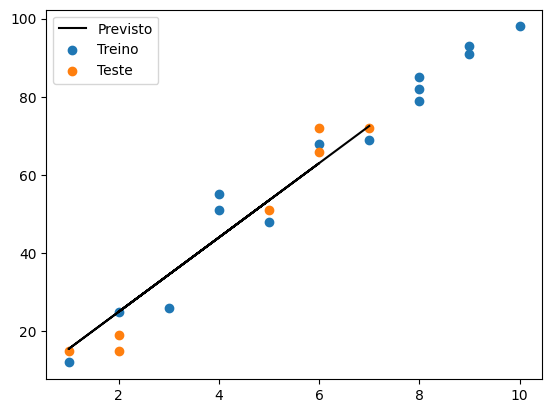

In [ ]:
# Uma vez realizada a regressão com os dados de treino e de teste, os resultados são mostrados abaixo no
# gráfico Previsto x Realizado

X_train = escala.inverse_transform(X_norm_train)  # Inversão da transformação de escala para melhor visualização
X_test = escala.inverse_transform(X_norm_test)    # Inversão da transformação de escala para melhor visualização

plt.scatter(X_train, Y_train, label = "Treino") 
plt.scatter(X_test, Y_test, label = "Teste")       # Mostra os dados de teste
plt.plot(X_test, Y_prev, label = "Previsto", color = "k")  # Mostra a previsão do modelo para os dados de teste
plt.legend(loc=2)

# **7 - Métricas da Regressão e Previsões**

In [ ]:
# Algumas métricas obtidas:

# Erro Quadrático Médio (MSE)
print('MSE: %.2f' % mean_squared_error(Y_test, Y_prev))
# Erro Absoluto Médio (MAE)
print('MAE: %.2f' % mean_absolute_error(Y_test, Y_prev))
# R2 Score
print('R2 Score: %.2f' % r2_score(Y_test, Y_prev))

MSE: 33.09
MAE: 4.49
R2 Score: 0.95


In [ ]:
#Para 2h de estudo o modelo prevê pontuação de aproximadamente 20 pontos
regressor.fit(X_train, Y_train)
regressor.predict([[2]])



array([20.51147266])

In [ ]:
# Através do método podemos verificar o coeficiente de inclinação e o intercepto da regressão.
print(regressor.coef_, regressor.intercept_)

[26.01390172] [57.13236938]


In [ ]:
from inspect import EndOfBlock
# Para as horas abaixo, podemos realizar uma previsão das pontuações, 
# considerando que a pontuação máxima será de 100.

hours = [[3], [5], [10], [8], [12], [13], [2]]
size = np.shape(hours)[0]
i=0
while i < size:
  if regressor.predict(hours)[i] > 100:
    print ('100')
  else: 
    print(round(regressor.predict(hours)[i],1))  

  i+=1

30.6
50.7
100
80.8
100
100
20.5
